In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
def load_data():
    train_df = pd.read_csv('../data/raw/Train.csv')
    waste_df = pd.read_csv('../data/raw/waste_management.csv')
    toilets_df = pd.read_csv('../data/raw/toilets.csv')
    water_df = pd.read_csv('../data/raw/water_sources.csv')
    return train_df, waste_df, toilets_df, water_df

train_df, waste_df, toilets_df, water_df = load_data()


Analyzing disease: Dysentery


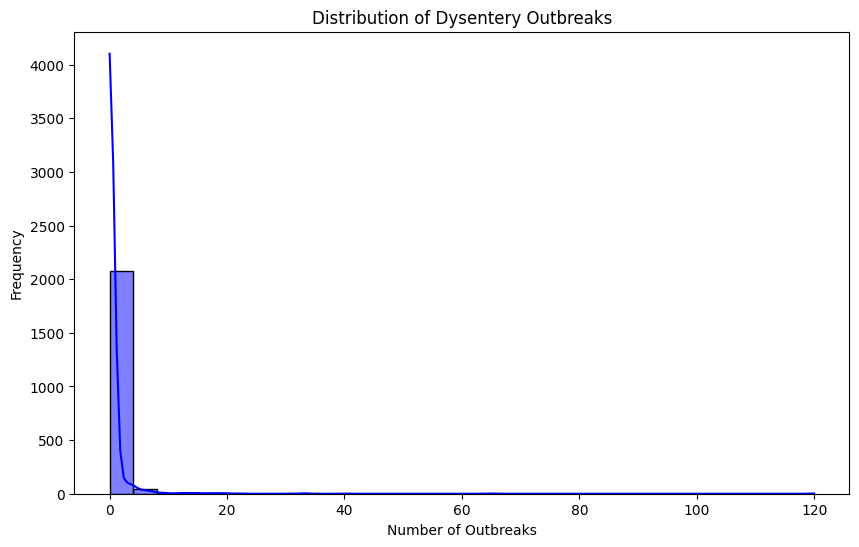

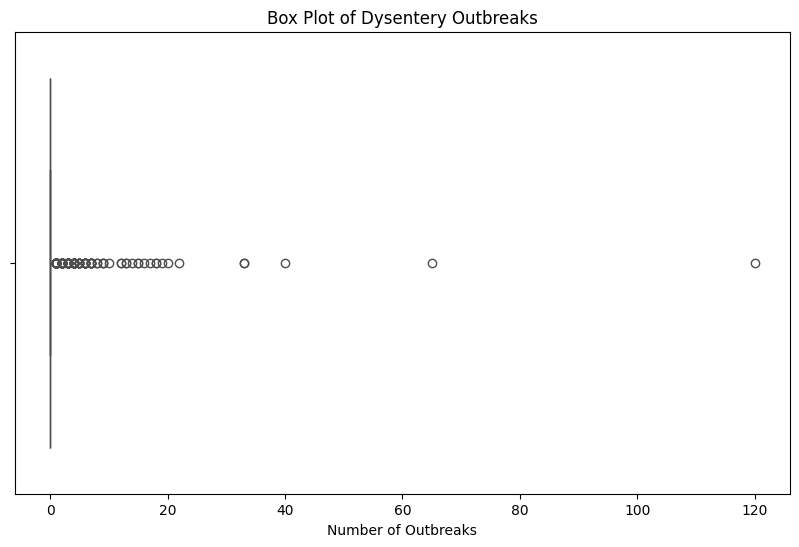

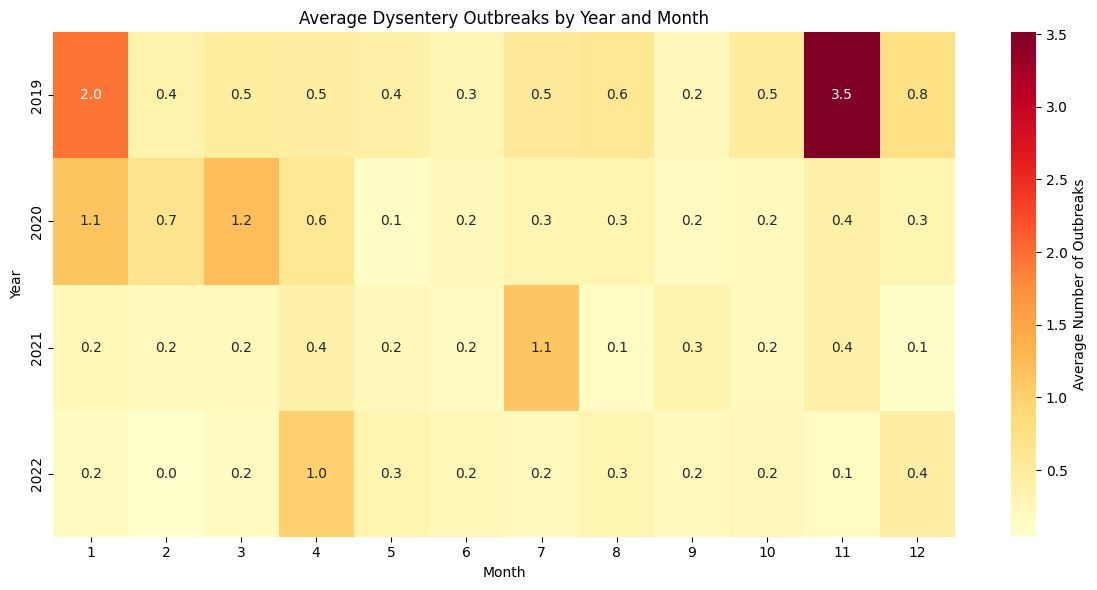

Analyzing disease: Typhoid


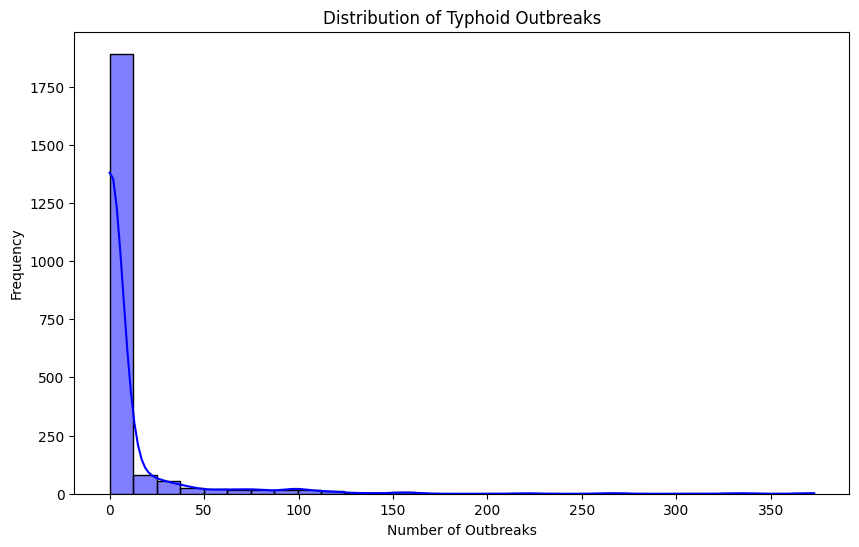

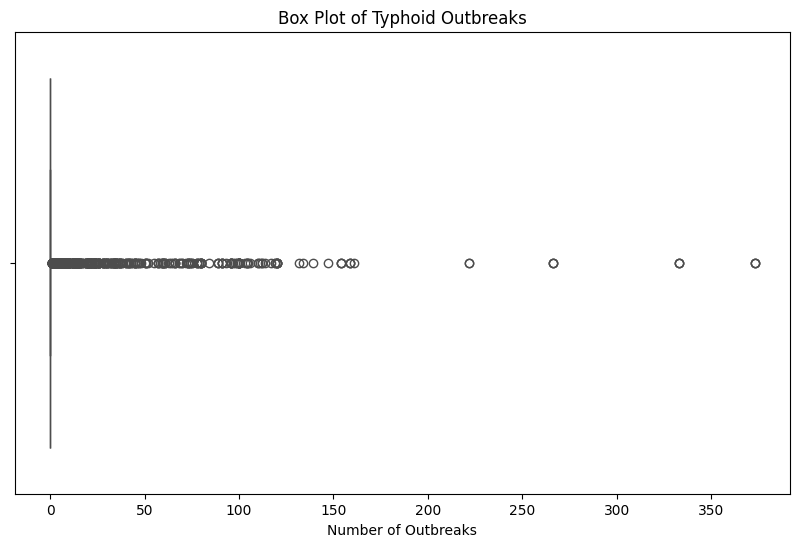

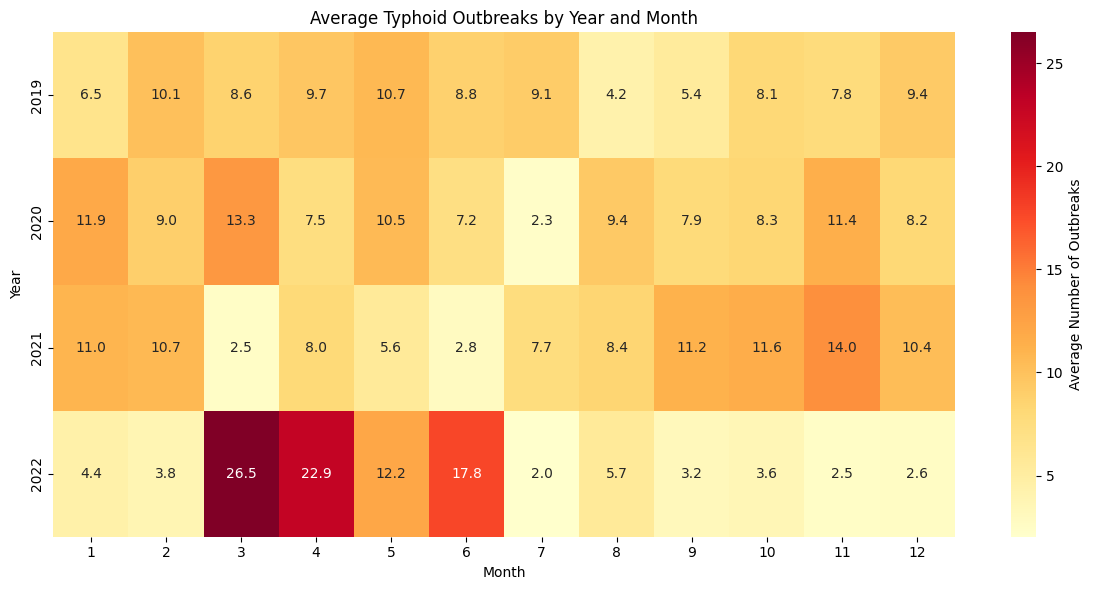

Analyzing disease: Diarrhea


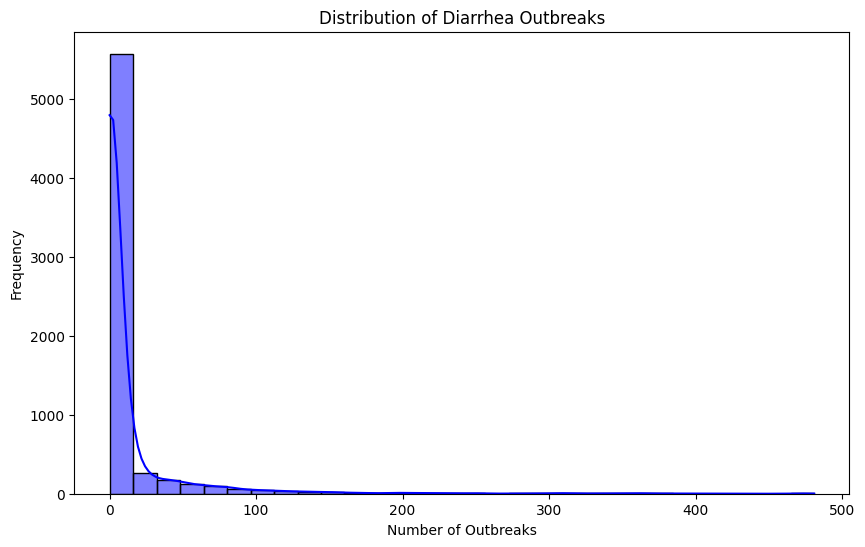

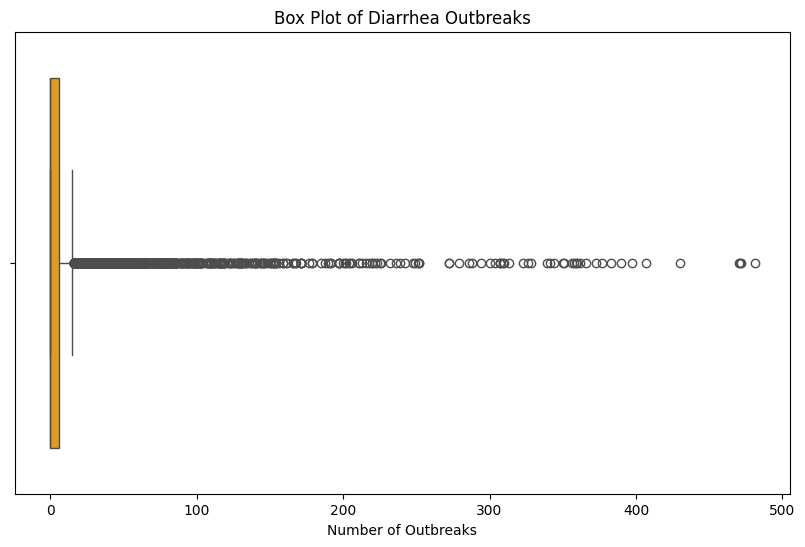

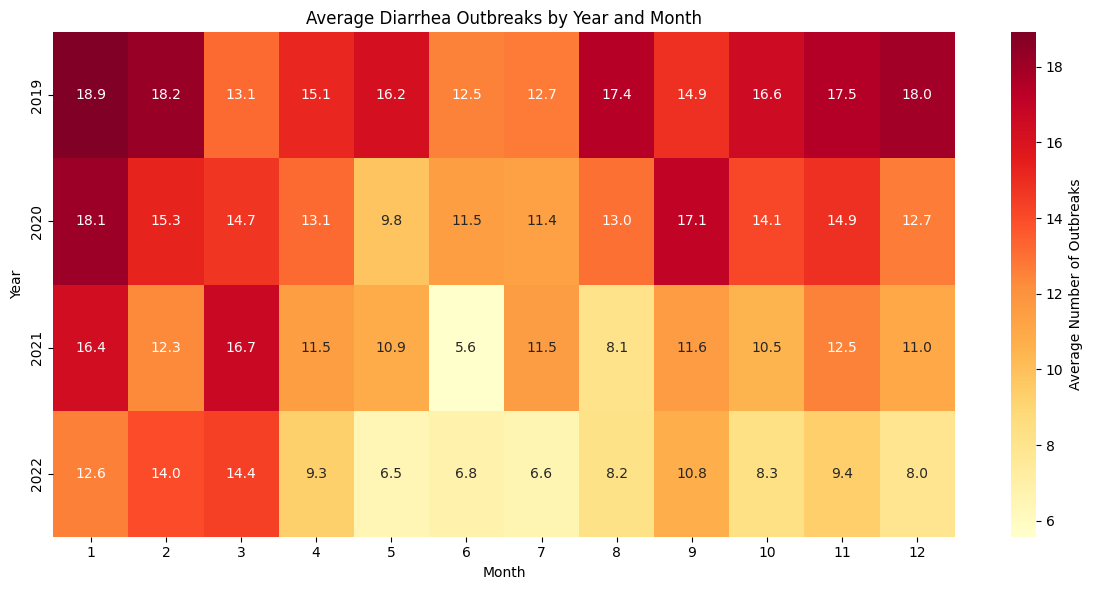

Analyzing disease: Schistosomiasis


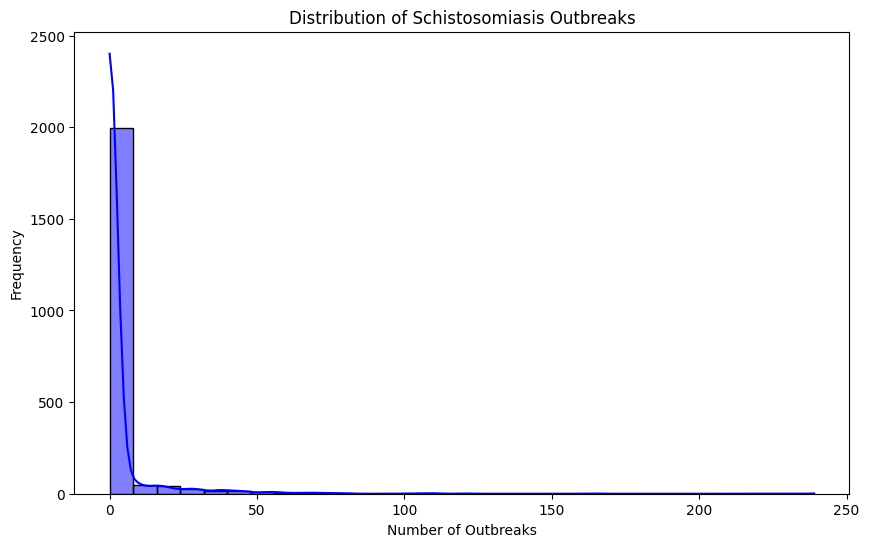

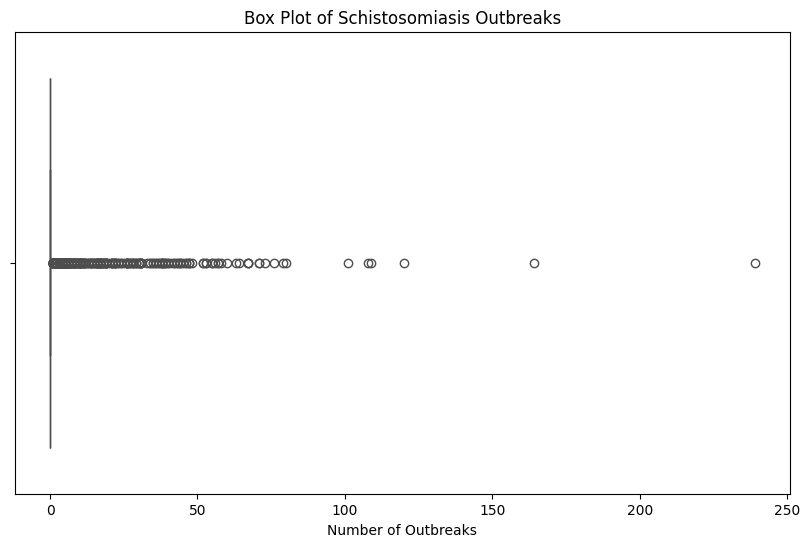

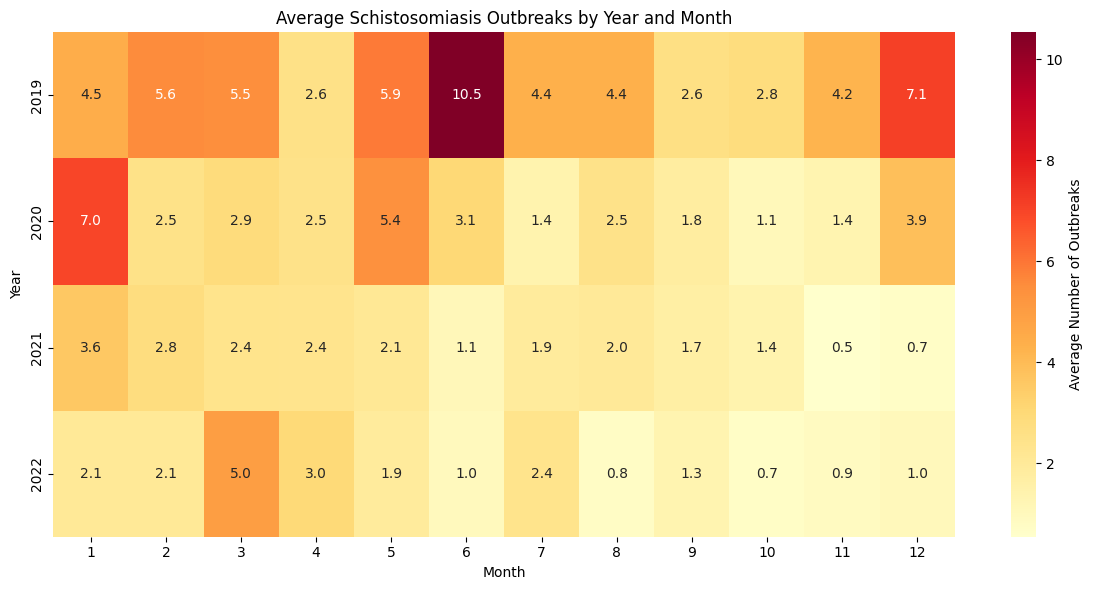

Analyzing disease: Malaria


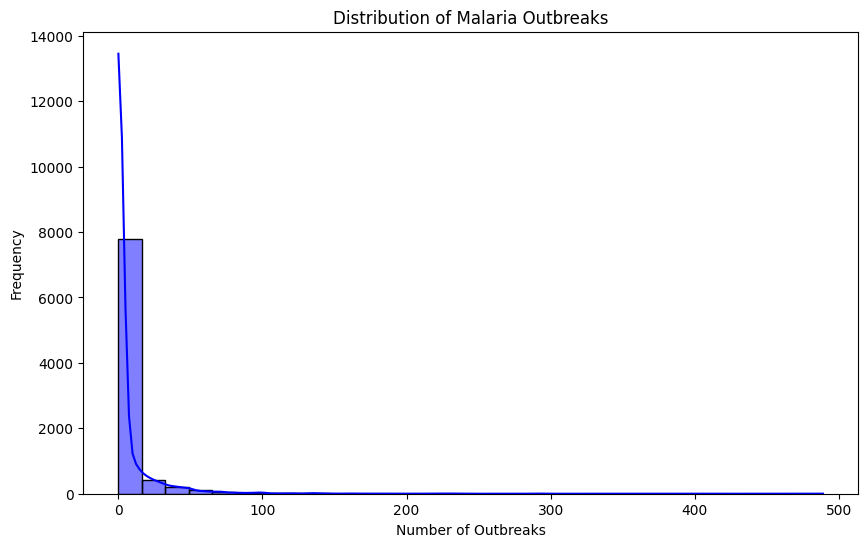

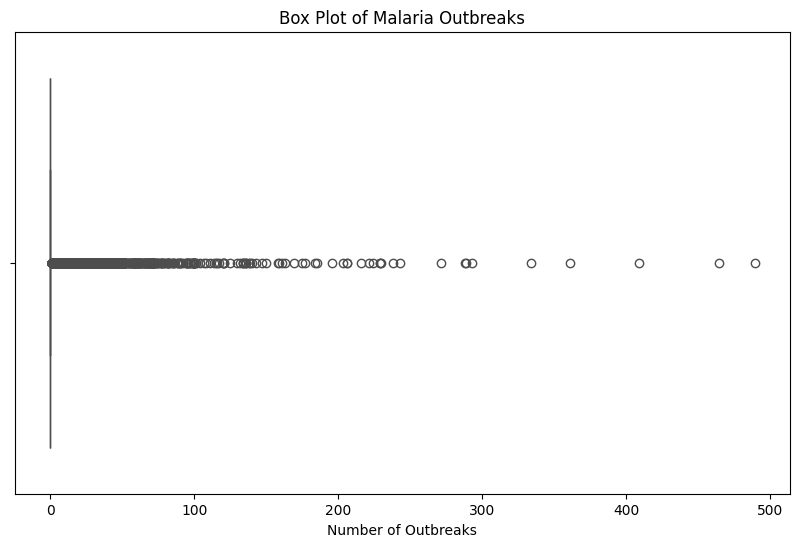

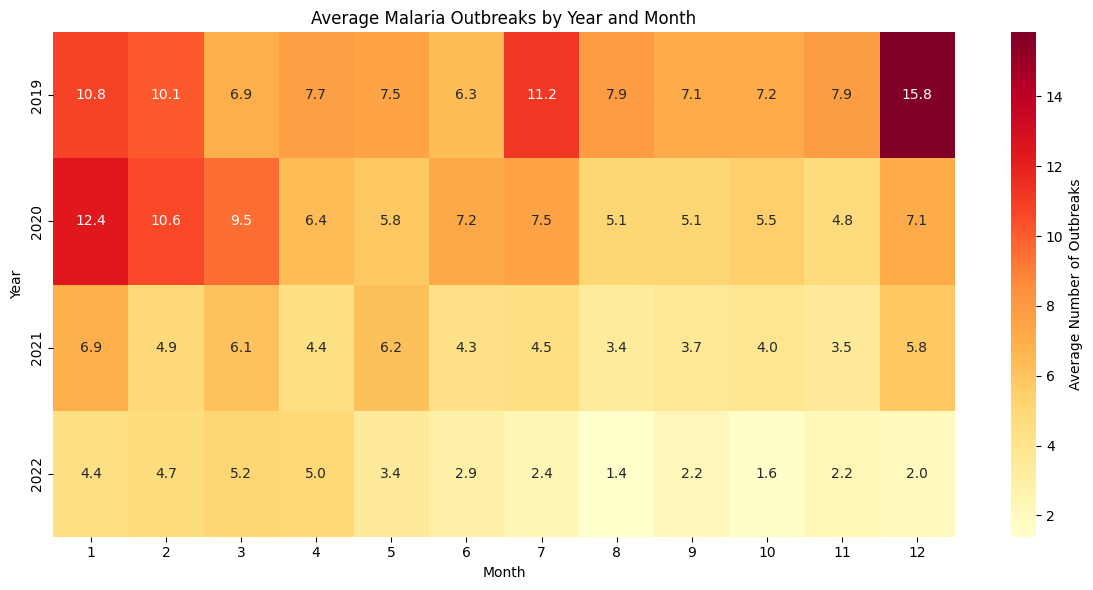

Analyzing disease: Intestinal Worms


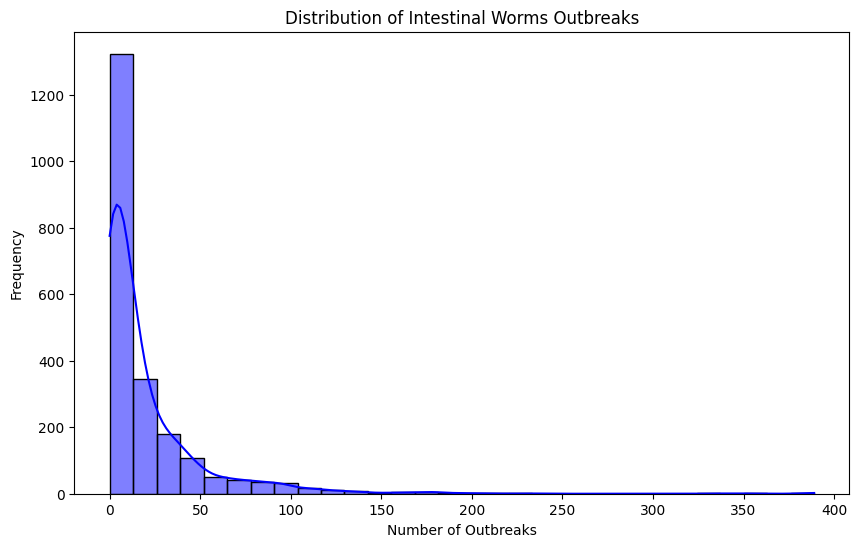

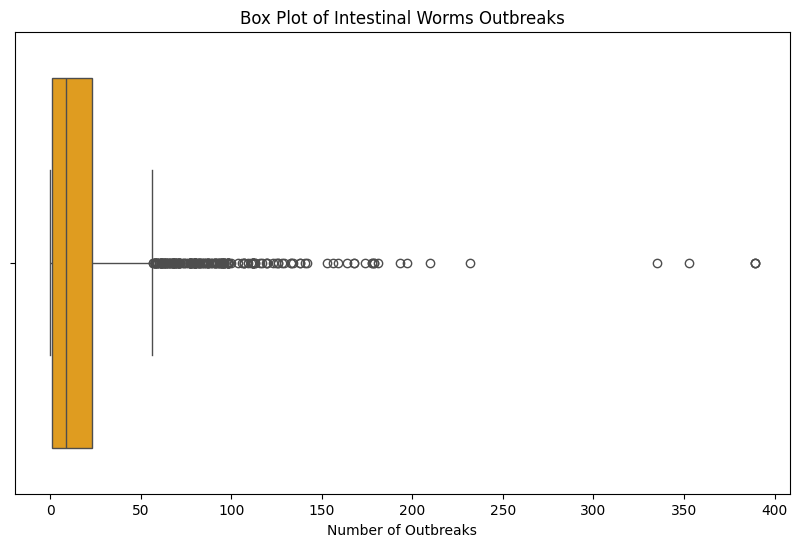

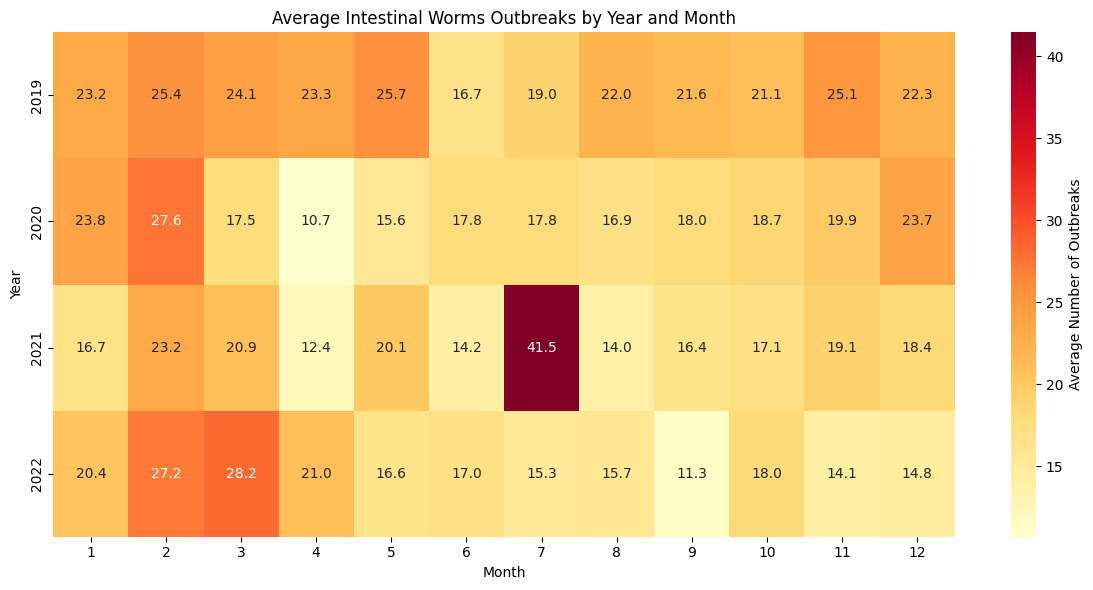

Analyzing disease: Cholera


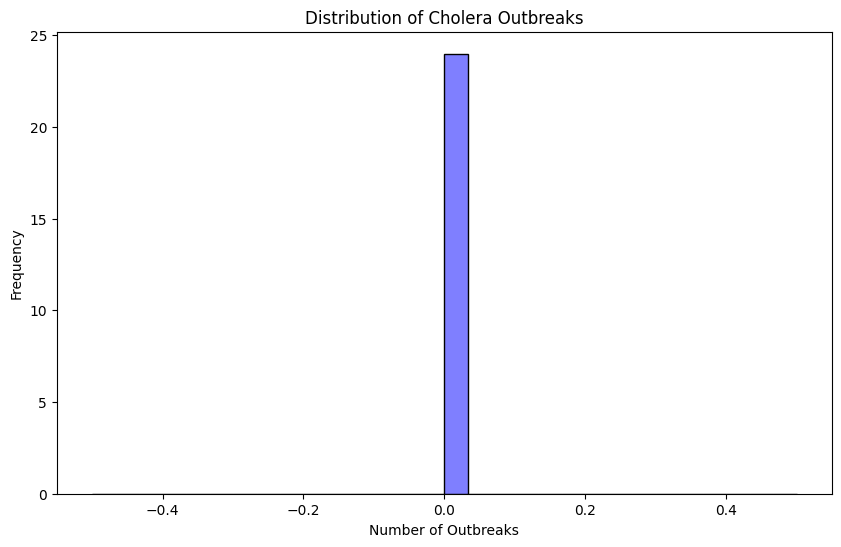

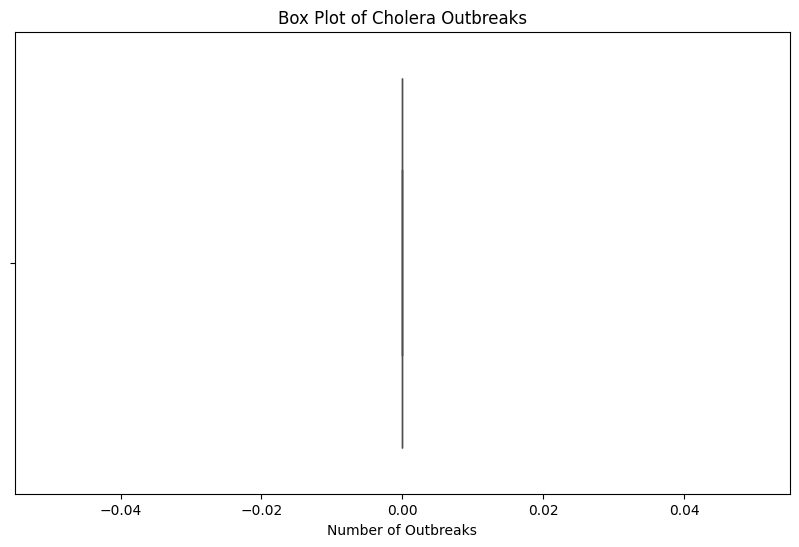

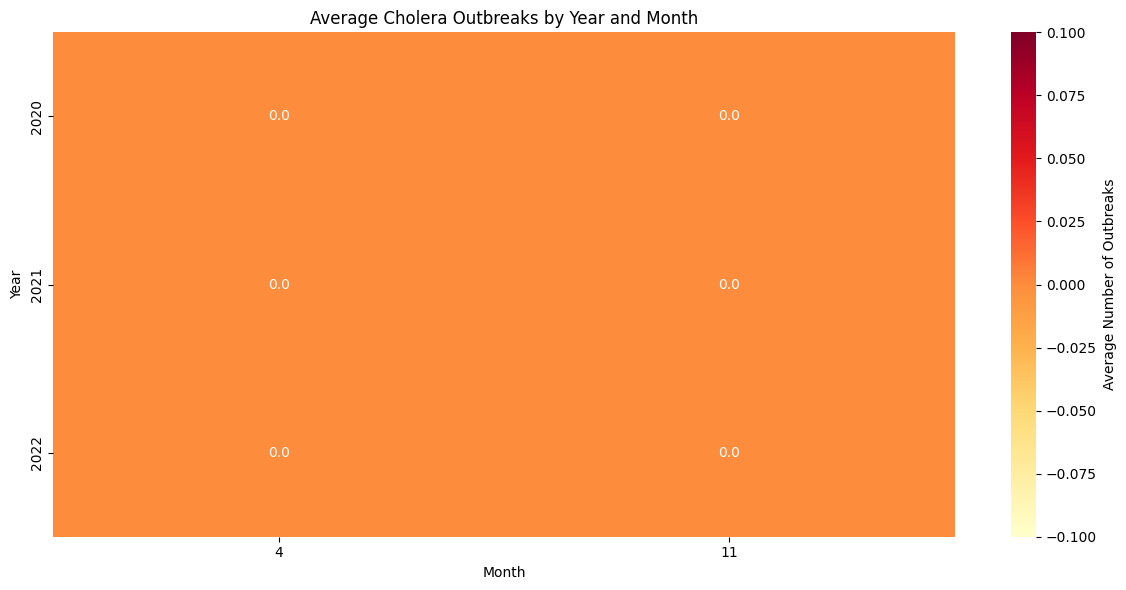

In [3]:
# Function to analyze disease patterns for each disease
def analyze_disease_patterns_by_disease(train_df):
    """
    This function creates visualizations for each disease:
    1. Distribution plot of disease counts.
    2. Boxplot of disease counts.
    3. Heatmap of average outbreaks by year and month.
    """
    # Get the list of unique diseases
    diseases = train_df['Disease'].unique()

    for disease in diseases:
        print(f"Analyzing disease: {disease}")
        
        # Filter data for the current disease
        disease_df = train_df[train_df['Disease'] == disease]

        # Plot 1: Distribution of Disease Counts
        plt.figure(figsize=(10, 6))
        sns.histplot(disease_df['Total'], bins=30, kde=True, color='blue')
        plt.title(f'Distribution of {disease} Outbreaks')
        plt.xlabel('Number of Outbreaks')
        plt.ylabel('Frequency')
        plt.show()

        # Plot 2: Boxplot of Disease Counts
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=disease_df['Total'], color='orange')
        plt.title(f'Box Plot of {disease} Outbreaks')
        plt.xlabel('Number of Outbreaks')
        plt.show()

        # Plot 3: Heatmap of Average Outbreaks by Year and Month
        # Create a pivot table for the heatmap
        disease_pivot = disease_df.pivot_table(
            index='Year',          # Rows will be years
            columns='Month',       # Columns will be months
            values='Total',        # Values will be outbreak counts
            aggfunc='mean'        # Calculate average for each combination
        ).fillna(0)               # Replace any missing values with 0

        plt.figure(figsize=(12, 6))
        sns.heatmap(disease_pivot, 
                    cmap='YlOrRd',    # Yellow to Red color scheme
                    annot=True,       # Show numbers in cells
                    fmt='.1f',        # Format numbers to 1 decimal place
                    cbar_kws={'label': 'Average Number of Outbreaks'})
        plt.title(f'Average {disease} Outbreaks by Year and Month')
        plt.xlabel('Month')
        plt.ylabel('Year')
        plt.tight_layout()
        plt.show()

# Run the analysis for each disease
analyze_disease_patterns_by_disease(train_df)

In [ ]:

# Analyze Disease Patterns
def analyze_disease_patterns(df):
    """
    This function creates two visualizations to analyze disease patterns:
    1. A boxplot showing the distribution of outbreaks for each disease
    2. A heatmap showing average outbreaks by disease across time
    """

    # Part 1: Boxplot Analysis
    plt.figure(figsize=(12, 6))  # Create a figure of size 12x6 inches
    sns.boxplot(x='Disease', y='Total', data=df)
    """
    This creates a boxplot that shows:
    - Median number of outbreaks (horizontal line in box)
    - Interquartile range (IQR) (the box)
    - Whiskers (typically 1.5 * IQR)
    - Outliers (points beyond whiskers)
    for each disease type
    """
    plt.title('Distribution of Outbreaks by Disease Type', fontsize=14)
    plt.xticks(rotation=45)  # Rotate disease names 45 degrees for better readability
    plt.xlabel('Disease Type', fontsize=12)
    plt.ylabel('Number of Outbreaks', fontsize=12)
    plt.show()

    # Part 2: Heatmap Analysis
    # Create a pivot table for the heatmap
    disease_pivot = df.pivot_table(
        index='Disease',          # Rows will be diseases
        columns=['Year', 'Month'], # Columns will be Year-Month combinations
        values='Total',           # Values will be outbreak counts
        aggfunc='mean'           # Calculate average for each combination
    ).fillna(0)                  # Replace any missing values with 0
    
    plt.figure(figsize=(30, 15))  # Create a new figure
    sns.heatmap(disease_pivot, 
                cmap='YlOrRd',    # Yellow to Red color scheme
                annot=True,       # Show numbers in cells
                fmt='.1f',        # Format numbers to 1 decimal place
                cbar_kws={'label': 'Average Number of Outbreaks'})
    """
    The heatmap shows:
    - Each row is a disease type
    - Each column is a specific year-month
    - Color intensity indicates the average number of outbreaks
    - Actual values are shown in each cell
    """
    plt.title('Disease Outbreaks Heatmap (Year-Month)', fontsize=14)
    plt.ylabel('Disease Type', fontsize=12)
    plt.xlabel('Year-Month', fontsize=12)
    plt.tight_layout()  # Adjust layout to prevent label overlap
    plt.show()

analyze_disease_patterns(train_df)